In [1]:
from tinyphysics import TinyPhysicsModel, TinyPhysicsSimulator, CONTROL_START_IDX
from controllers import SimpleController
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme()


In [2]:
def plot_rollout(sim):
  fig, ax = plt.subplots(figsize=(10, 5))
  ax.plot(sim.target_lataccel_history, label="Target Lateral Acceleration", alpha=0.5)
  ax.plot(sim.current_lataccel_history, label="Actual Lateral Acceleration", alpha=0.5)
  ax.legend()
  ax.set_xlabel("Step")
  ax.set_ylabel("Lateral Acceleration")
  ax.set_title("Rollout")
  plt.show()

In [3]:
model = TinyPhysicsModel("./models/tinyphysics.onnx", debug=True)
controller = SimpleController()

ONNX Runtime is using GPU


2024-05-01 04:57:13.006938478 [E:onnxruntime:Default, provider_bridge_ort.cc:1480 TryGetProviderInfo_CUDA] /onnxruntime_src/onnxruntime/core/session/provider_bridge_ort.cc:1193 onnxruntime::Provider& onnxruntime::ProviderLibrary::Get() [ONNXRuntimeError] : 1 : FAIL : Failed to load library libonnxruntime_providers_cuda.so with error: libcublasLt.so.11: cannot open shared object file: No such file or directory

2024-05-01 04:57:13.006982830 [W:onnxruntime:Default, onnxruntime_pybind_state.cc:747 CreateExecutionProviderInstance] Failed to create CUDAExecutionProvider. Please reference https://onnxruntime.ai/docs/execution-providers/CUDA-ExecutionProvider.html#requirements to ensure all dependencies are met.


In [4]:
sim = TinyPhysicsSimulator(model, "./data/00000.csv", controller=controller, debug=False)
sim.rollout()

{'lataccel_cost': 11.184461431626662,
 'jerk_cost': 46.32548350198396,
 'total_cost': 102.24779066011726}

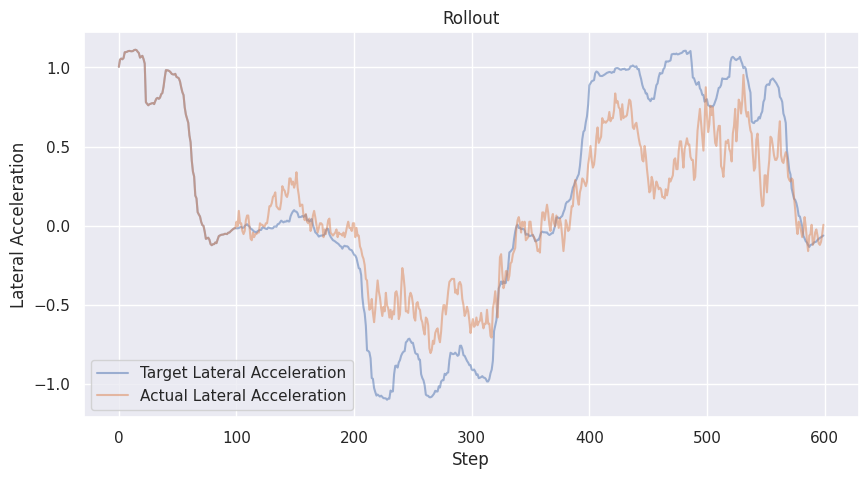

In [5]:
plot_rollout(sim)